In [29]:
import matplotlib.pyplot as plt
import numpy as np
from jupyterthemes import jtplot
from prettytable import PrettyTable

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec

In [2]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory

qmf = QuantumMatterFactory()
qmf.get_login()

Auth(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x12\x00\x00\x00\xc…

In [3]:
qmf.get_client()

Job Limits:
╒══════════════╤═══════════════════╤═══════════════╕
│   Daily Used │   Daily Remaining │   Daily Limit │
╞══════════════╪═══════════════════╪═══════════════╡
│            0 │                10 │            10 │
╘══════════════╧═══════════════════╧═══════════════╛


In [16]:
barrier = qmf.create_barrier(
    positions=[-1, -1],  # fine tune to split the cloud into roughly equal parts
    heights=[70, 70],
    widths=[4, 4],  # adjust as free parameter to optimize observed interference
    times=[2, 7]
)

In [20]:
matter_in_trap2 = qmf.create_quantum_matter(
    temperature=50,  # another free parameter available for optimizing observed interference
    barriers=[barrier],
    lifetime=barrier.death,
    image="IN_TRAP",
    name="Half-n-Half #3"
)

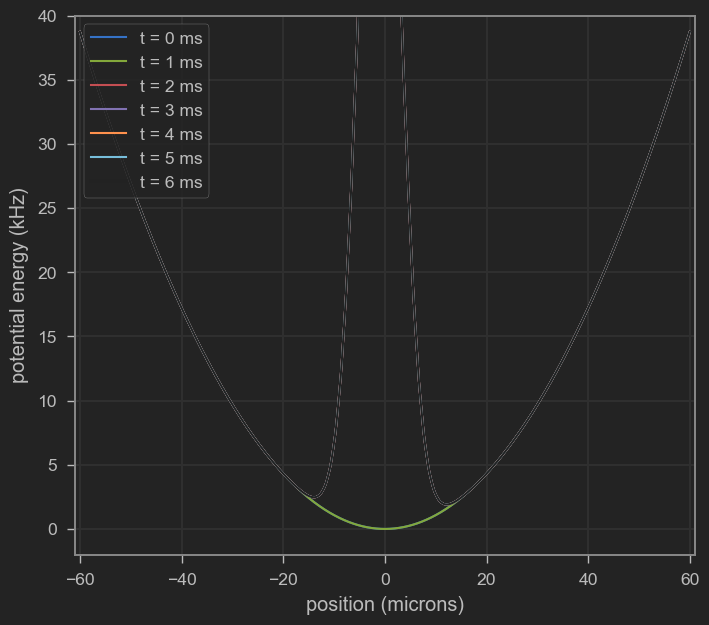

In [21]:
matter_in_trap2.show_potential(times=[0, 1, 2, 3, 4, 5, 6], ylimits=[-2, 40])

In [22]:
#matter_in_trap2.submit(track=True)

Submitting 1 job(s):

- Job: Half-n-Half #3
  Job ID: 4d25d4c3-f71c-49f5-9365-769d4dfc47e6

Tracking 1 job(s):

- Job: Half-n-Half #3
  - RUNNING
  - COMPLETE

All job(s) complete


In [23]:
matter_in_trap2.get_result()

In [38]:
def plot_tof(matter, ax = None, show_x = False, show_y = False):
    if ax is None:
        ax = plt.gca()
        
    nrows = matter.output.tof_image.rows
    ncols = matter.output.tof_image.columns
    pixcal = matters[1].output.tof_image.pixcal
    
    im = ax.imshow(np.array(matter.output.tof_image.pixels).reshape(nrows, ncols), extent = [-pixcal * ncols//2, pixcal * ncols//2, -pixcal * nrows//2, pixcal * nrows//2])
    ax.grid(False)
 
    if show_x: ax.set_xlabel("x position (microns)")
    if show_y: ax.set_ylabel("y position (microns)")
    ax.set_title(f"Time of Flight: {matter.time_of_flight} ms")
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(im, cax = cax, orientation='vertical')
    
def plot_it(matter, ax = None, show_x = False, show_y = False):
    if ax is None:
        ax = plt.gca()
        
    nrows = matter.output.it_plot.rows
    ncols = matter.output.it_plot.columns
    pixcal = matter.output.it_plot.pixcal
    
    im = ax.imshow(np.array(matter.output.it_plot.pixels).reshape(nrows, ncols), extent = [-pixcal * ncols//2, pixcal * ncols//2, -pixcal * nrows//2, pixcal * nrows//2])
    ax.grid(False)
    if show_x: ax.set_xlabel("x position (microns)")
    if show_y: ax.set_ylabel("y position (microns)")
#     ax.set_title(f"In-trap image")
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(im, cax = cax, orientation='vertical')

C:\Users\saksh\AppData\Local\Temp\ipykernel_75208\3536321567.py:36: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im, cax = cax, orientation='vertical')


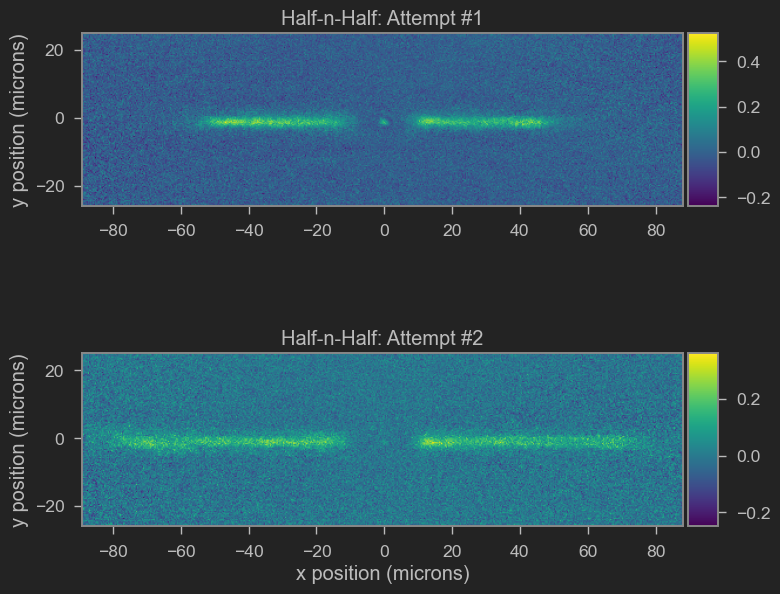

In [43]:
fig, axes = plt.subplots(2, 1)
plot_it(matter_in_trap, ax = axes[0], show_x = False, show_y = True)
plot_it(matter_in_trap2, ax = axes[1], show_x = True, show_y = True)

axes[0].set_title("Half-n-Half: Attempt #1")
axes[1].set_title("Half-n-Half: Attempt #2")
plt.tight_layout()